# Data Science Project - Sales Prediction

- Our challenge is to predict the sales we will have in a given period based on advertising spending in the three major networks where the company Hashtag invests: TV, Newspaper, and Radio.


# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio


In [62]:
import pandas as pd

#importinf the database / importando a base de dados
table = pd.read_csv('novos.csv')
table_adv = pd.read_csv('advertising.csv')
#display(table)
#display(table_adv)

print(table_adv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


### Exploratory Analysis
- Let's try to visualize how the information for each item is distributed.
- Let's see the correlation between each of the items.

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

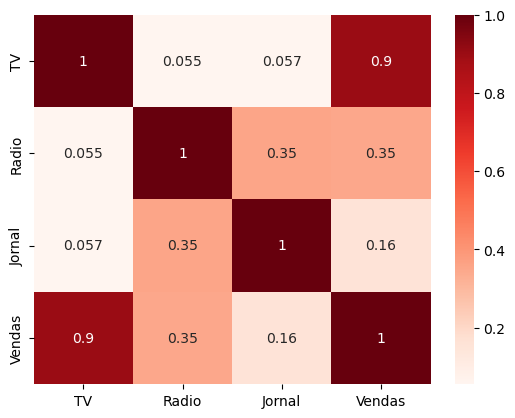

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
#display(table_adv.corr())

#create the graphic / Criando o grafico
sns.heatmap(table_adv.corr(),cmap="Reds",annot=True)

# Display the graphic / Mostrando o grafico
plt.show()

### With this, we can move on to data preparation to train the Machine Learning model
- Splitting into training data and testing data

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [64]:
#get all the columns without "vendas" / Escrever todas as colunas sem vendas
columns = table_adv.columns.tolist()
print(columns[0:3])

['TV', 'Radio', 'Jornal']


In [65]:
from sklearn.model_selection import train_test_split
 
# y is who you want to predict / y é quem voce quer prever
y = table_adv['Vendas']

# x is who you will use to predict y, the rest of the table / x é quem voce vai usar pra prever y, o resto da tabela

x= table_adv[['TV','Radio','Jornal']]
 
# Split the table in train and test / Divide a tabela entre treino e teste
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y, test_size = 0.3)


### We have a regression problem - Let's choose the models we will use:
- Linear Regression
- Random Forest (Decision Tree)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Create the models / Criando os modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Training the models / Treinando os modelos
modelo_regressaolinear.fit(x_treino,y_treino)
modelo_arvoredecisao.fit(x_treino,y_treino)

print("Modelos Treinados")


Modelos Treinados


#### AI Testing and Evaluation of the Best Model
- We will use R² -> indicates the percentage that our model can explain what happens

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [67]:
# Reading the results / Lendo os resultados
from sklearn.metrics import r2_score

previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

# Compare the predict with the y_teste / comparando a previsão com o y_teste
print(r2_score(y_teste,previsao_arvoredecisao))
print(r2_score(y_teste,previsao_regressaolinear))

0.9468555183792334
0.8940787991251672


#### Graphical Visualization of Predictions

#### Visualização Gráfica das Previsões

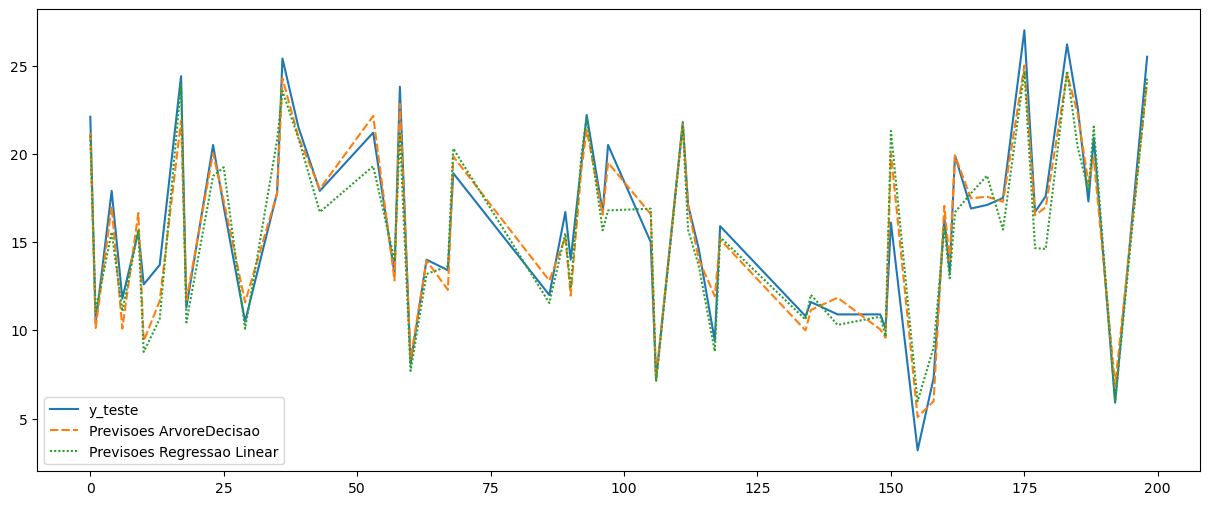

In [68]:
# Creating a table so we can visualize which is the best / criando uma tabela para visualizar which one is the best 
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

# Ploting the graph / plotando o grafico

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

### How to make a new prediction?

#### Como fazer uma nova previsão?

In [69]:
# Reading the table with the new values / lendo a tabela com os valores novos
tabela_nova = pd.read_csv('novos.csv')
display(tabela_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [75]:
# Since the most accurate model was the decision tree, we will use it to make predictions
# Como o modelo mais preciso foi de arvore de decisao vamos usa-lo para prever 
previsao = modelo_arvoredecisao.predict(tabela_nova)
display(previsao)

array([ 7.272,  8.597, 20.451])